# <div align="center"> __Analyse Hilbertienne et Fourier :__ </div>
# <div align="center"> __TP1 - Convolution et échantillonnage__ </div>

In [159]:
import numpy as np
import matplotlib.pyplot as plt

## **Exercice 1 - Son sinusoïdal**

In [160]:
f = 440
pulsation = 2*np.pi*f

fe = 8800

deb = 0.0
fin = 3.0
N = int(fe*(fin - deb))


abscisses_t1 = np.linspace(deb, fin, N)
sinus1 = np.sin(pulsation * abscisses_t1)

In [161]:
sinus1_fft = np.fft.fft(sinus1)
sinus1_abs_fft = np.abs(sinus1_fft)

abscisses_n = np.linspace(-N/2,N/2,N)

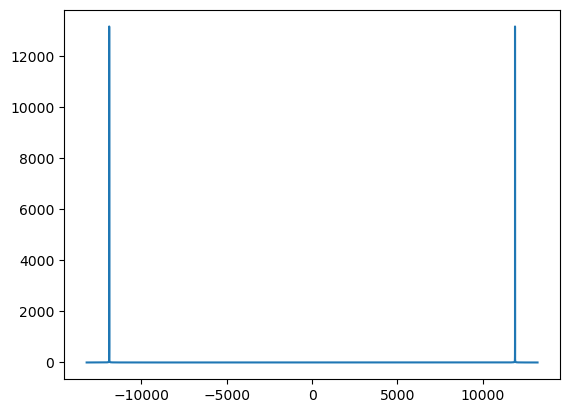

In [162]:
plt.plot(abscisses_n, sinus1_abs_fft)

In [163]:
abscisses_f = np.fft.fftfreq(N, 1/fe)

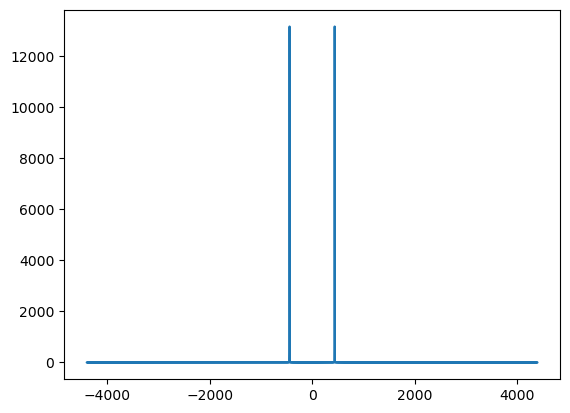

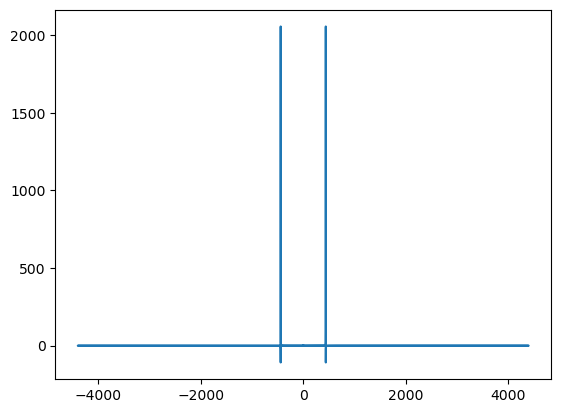

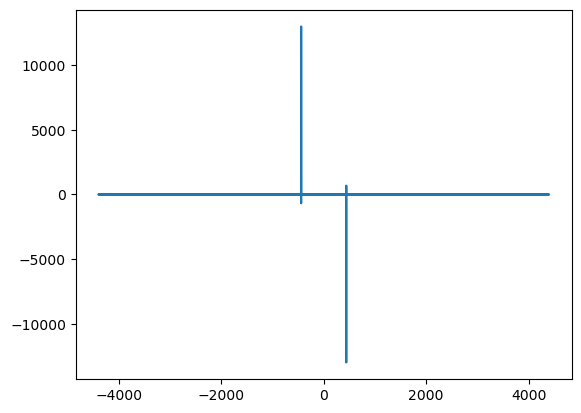

In [164]:
plt.plot(abscisses_f, sinus1_abs_fft)
plt.show()
plt.plot(abscisses_f, np.real(sinus1_fft))
plt.show()
plt.plot(abscisses_f, np.imag(sinus1_fft))
plt.show()

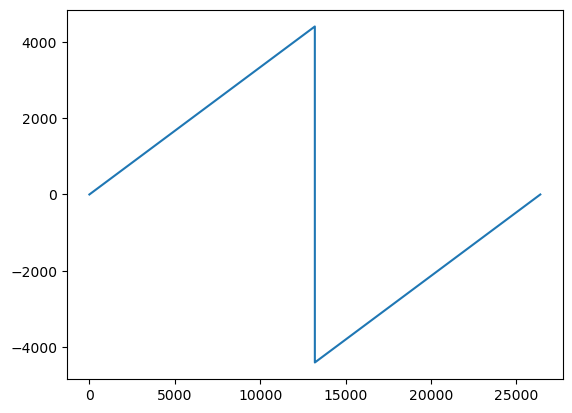

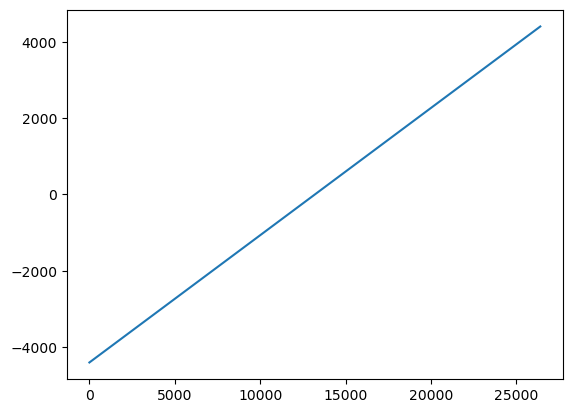

In [165]:
abscisses_f_shift = np.fft.fftshift(abscisses_f)
plt.plot(abscisses_f)
plt.show()
plt.plot(abscisses_f_shift)
plt.show()

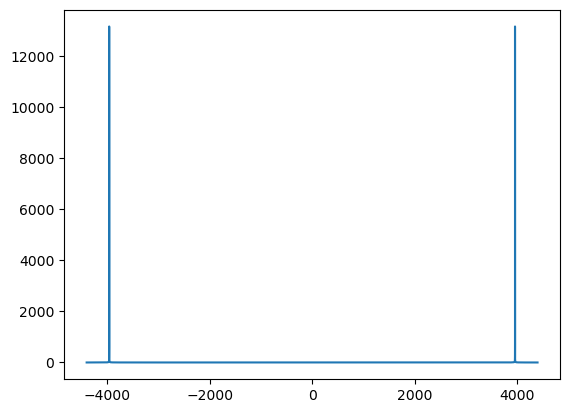

In [166]:
plt.plot(abscisses_f_shift, sinus1_abs_fft)

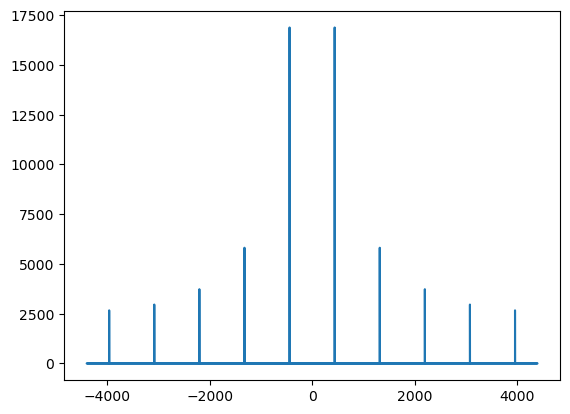

In [167]:
carre1 = np.sign(sinus1)
carre1_fft = np.fft.fft(carre1)
carre1_abs_fft = np.abs(carre1_fft)

plt.plot(abscisses_f, carre1_abs_fft)

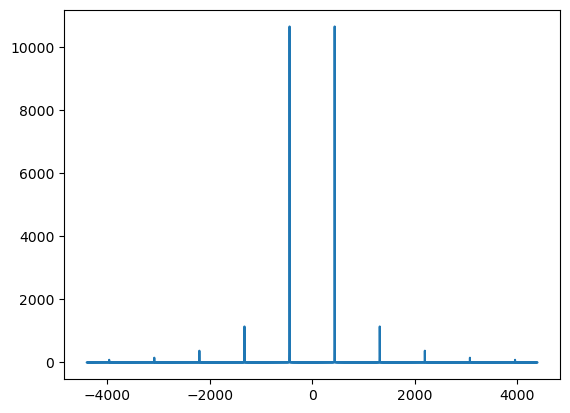

In [168]:
triangle1 = (2/np.pi)*np.arcsin(sinus1)
triangle1_fft = np.fft.fft(triangle1)
triangle1_abs_fft = np.abs(triangle1_fft)

plt.plot(abscisses_f, triangle1_abs_fft)

## **Exercice 2 - Visualisation de la transformée de Fourier discrète**

In [169]:
def aff_fft(abscisses_t, signal):
    N = np.size(abscisses_t, 0)

    #abscisses_n = np.linspace(-N/2,N/2,N)
    abscisses_f = np.fft.fftfreq(N, 1/fe)
    fft_signal = np.fft.fft(signal)

    plt.figure(figsize=(10, 5))

    plt.subplot(2, 2, 1)
    plt.plot(abscisses_t, signal)
    plt.title('Signal')
    plt.xlabel('Temps (s)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 2, 2)
    plt.plot(abscisses_f, np.abs(fft_signal))
    plt.title('Module de la transformée de Fourier')
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 2, 3)
    plt.plot(abscisses_f, np.real(fft_signal))
    plt.title('Partie réelle de la transformée de Fourier')
    plt.xlabel('Temps (s)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 2, 4)
    plt.plot(abscisses_f, np.imag(fft_signal))
    plt.title('Partie imaginaire de la transformée de Fourier')
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Amplitude')

    plt.tight_layout()

    plt.show()

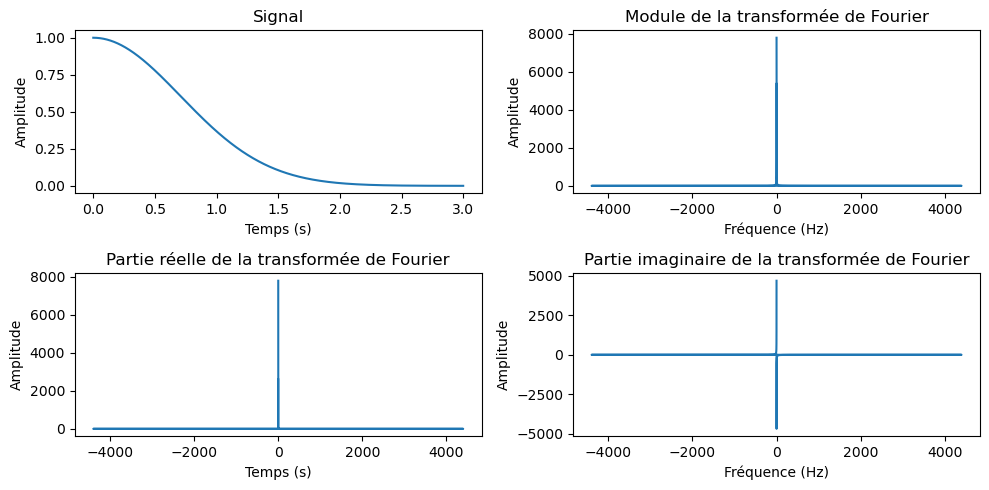

In [170]:
signal_gauss1 = np.exp(-abscisses_t1**2)
aff_fft(abscisses_t1, signal_gauss1)

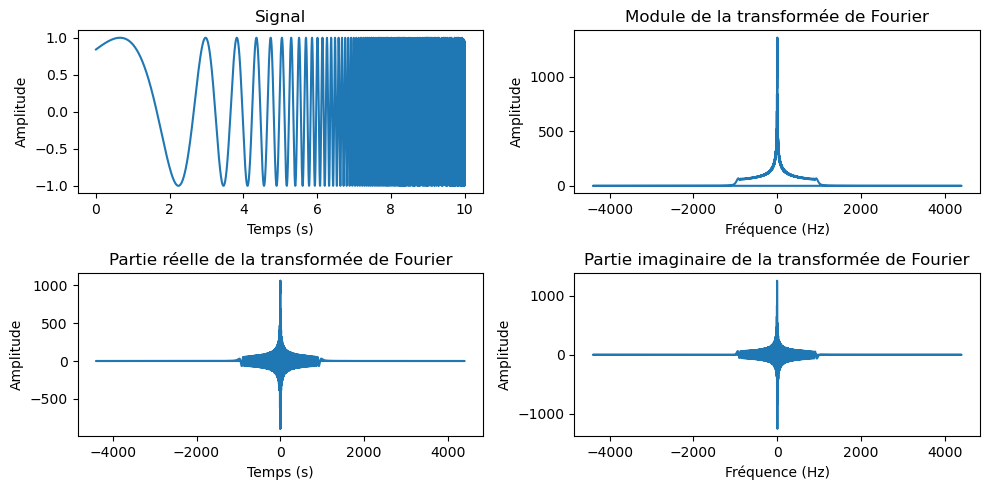

In [175]:
abscisses_t2 = np.linspace(0, 10, 10000)
signal_chirp = np.sin(2**abscisses_t2)
aff_fft(abscisses_t2, signal_chirp)

On doit tester sur d'autres signaux et faire varier leurs paramètres mais je ne l'ai pas encore fait (Q2 et Q3).

In [149]:
# TODO

## **Exercice 3 - Phénomène de Gibbs**

In [184]:
h = 1e-3
T = 2

abscisses_t3 = np.linspace(-T,T, 2*T*int(1/h))
signal_heaviside = np.where(abscisses_t3 < 0, 0, 1)

/home/n7student/miniforge3/envs/modia_py_mathsapp/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


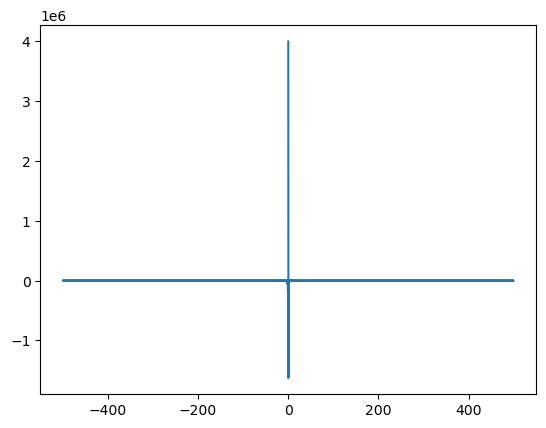

In [185]:
fft_signal_heaviside = np.fft.fft(signal_heaviside)

N3 = np.size(abscisses_t3, 0)

abscisses_n3 = np.linspace(-N3/2,N3/2,N3)
abscisses_f3 = np.fft.fftfreq(N3, h)

DSE_fft_signal_heaviside = fft_signal_heaviside**2

plt.plot(abscisses_f3, DSE_fft_signal_heaviside)

/home/n7student/miniforge3/envs/modia_py_mathsapp/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


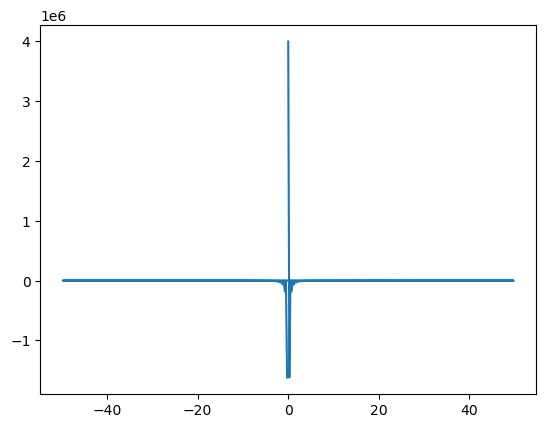

In [190]:
lambda0 = 650

abscisses_f3_selec = abscisses_f3[np.abs(abscisses_f3) < lambda0]
DSE_fft_signal_heaviside_selec = DSE_fft_signal_heaviside[np.abs(abscisses_f3) < lambda0]

plt.plot(abscisses_f3_selec, DSE_fft_signal_heaviside_selec)